<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - Clustering Módulo Análisis de Datos, EMI2016-1, 1° Semestre 2019

**Alumno: Felipe Quezada Gajardo** 

**Instrucciones**

* (i) Construir una matriz de incidencia entre clientes y ofertas. Los datos serı́an los clientes que se caracterizan por un vector de dimensión 32 y componentes binarias.
* (ii) Correr el algoritmo kmeans para encontrar los clusters. Para ello se puede utilizar en Python el objeto KMeans de sklearn.clusters.
* (iii) Caracterizar los clusters de clientes resultantes en base a las caracterı́sticas de las ofertas más utilizadas en cada cluster.
* (iv) Identificar el número más adecuado de clusters utilizando el método del codo, y el de silhouette (objeto silhouette score de sklearn.metrics).

In [0]:
# Import de dependencias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# Para subir el archivo a Collabs 
# Se debe cargar el Archivo Wine_Transactions.xlsx desde nuestro PC.
from google.colab import files
uploaded = files.upload()

Saving Wine_Transactions.xlsx to Wine_Transactions.xlsx


In [0]:
# Cargamos el archivo .xlsx a una Variable
import io
wine_transactions = pd.ExcelFile(io.BytesIO(uploaded['Wine_Transactions.xlsx']))
#print(wine_transactions)


# Se lée la hoja de OfferInformation
OfferInformation = pd.read_excel(wine_transactions, sheet_name=0)
#print(OfferInformation)


# Se lée la hoja de Transactions
Transactions = pd.read_excel(wine_transactions, sheet_name=1)
Transactions['cont']=1
#print(Transactions)

# Se unen las dos hojas para que sea mas facil trabajar con los datos.
datos_entrada = pd.merge(OfferInformation, Transactions)
print(datos_entrada)


In [185]:
# Se construye la matriz de incidencia entre clientes y ofertas del punto i, se utiliza
# la funcion pivot_table
# Se obtienen los datos de Ofertas "Offer #" y los Consumidores "Customer Last Name"

matriz_incidencia = datos_entrada.pivot_table(index=['Customer Last Name'], columns=['Offer #'], values='cont')

matriz_incidencia = matriz_incidencia.fillna(0).reset_index()

# Matriz de Incidencia
#print('Matriz de Incidencia')
#print(matriz_invidencia)
matriz_resultado = matriz_incidencia


#Preparacion matriz de incidencia para usar en metodo del CODO y SILHOUETTE
matriz_pivot = pd.pivot_table(Transactions, index=["Offer #"], columns=["Customer Last Name"], aggfunc=len, fill_value='0')

# Convertir la matriz generada en una matriz para ser usada con numpy

X = matriz_pivot.as_matrix()
X = np.matrix(X)
data_metodos = X.T
#print('Matriz Solo de Datos para Metodo del Codo y Silhouette')
#print(data_metodos)


# Se guarda la lista de los costumer en un arreglo separado para ser utilizados despues.
costumer_col = matriz_incidencia.columns[1:]

#print(costumer_col)

# Aplicacion de el algoritmo de Kmeans del punto ii considerando 5 cluster optimos sugeridos
# por el metodo de Silhouette expuesto al final.
#print(matriz_incidencia[matriz_incidencia.columns[1:]])

#matriz_resultado['Cluster'] = KMeans(n_clusters=5).fit_predict(matriz_incidencia[matriz_incidencia.columns[1:]])
matriz_resultado['Cluster'] = KMeans(n_clusters=5).fit_predict(data_metodos)


#print('Matriz de Resultados en donde se Muestra los Costumer con sus Cluster respectivo')
print(matriz_resultado)


Offer # Customer Last Name    1    2    3    4  ...   29   30   31   32  Cluster
0                    Adams  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0        3
1                    Allen  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0        1
2                 Anderson  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0        4
3                   Bailey  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0        3
4                    Baker  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0        2
5                   Barnes  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0        2
6                     Bell  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0        4
7                  Bennett  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0        0
8                   Brooks  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0        0
9                    Brown  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0        3
10                  Butler  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0        1
11                Campbell  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
#(iii) Caracterizar los clusters de clientes resultantes en base a las caracterı́sticas de 
#las ofertas más utilizadas en cada cluster.
pca = PCA(n_components=2)

matriz_resultado['A'] = pca.fit_transform(matriz_resultado[costumer_col])[:,0]
matriz_resultado['B'] = pca.fit_transform(matriz_resultado[costumer_col])[:,1]

matriz_resultado = matriz_resultado.reset_index()

#print(matriz_resultado)

costumer_cluster = matriz_resultado[['Customer Last Name', 'Cluster', 'A','B']]
print(costumer_cluster)

# Se unen los datos para realizar caracterizacion
caracterizacion = pd.merge(Transactions,costumer_cluster)
caracterizacion = pd.merge(OfferInformation, caracterizacion)

#print(caracterizacion)

In [198]:
# Caracterizacion por Variedad (Varietal) por cada Cluster (0-1-2-3-4)
#Observaciones:
# Al apreciar los resultados de acuerdo a la Variedad se puede observar que 
# la variedad mas Consumida es el Champagne, seguido a continuación por el 
# Pinot Noir y luego los Espumantes.
#
#
caracterizacion['Varietal_Cluster_0'] = caracterizacion.Cluster == 0
print(caracterizacion.groupby("Varietal_Cluster_0").Varietal.value_counts())

caracterizacion['Varietal_Cluster_1'] = caracterizacion.Cluster == 1
print(caracterizacion.groupby("Varietal_Cluster_1").Varietal.value_counts())

caracterizacion['Varietal_Cluster_2'] = caracterizacion.Cluster == 2
print(caracterizacion.groupby("Varietal_Cluster_2").Varietal.value_counts())

caracterizacion['Varietal_Cluster_3'] = caracterizacion.Cluster == 3
print(caracterizacion.groupby("Varietal_Cluster_3").Varietal.value_counts())

caracterizacion['Varietal_Cluster_4'] = caracterizacion.Cluster == 4
print(caracterizacion.groupby("Varietal_Cluster_4").Varietal.value_counts())


Varietal_Cluster_0  Varietal          
False               Champagne             65
                    Pinot Noir            40
                    Prosecco              31
                    Malbec                27
                    Espumante             21
                    Cabernet Sauvignon    17
                    Pinot Grigio          14
                    Merlot                12
                    Chardonnay            10
True                Espumante             19
                    Champagne             16
                    Cabernet Sauvignon    15
                    Prosecco              12
                    Merlot                 8
                    Chardonnay             5
                    Malbec                 5
                    Pinot Noir             4
                    Pinot Grigio           3
Name: Varietal, dtype: int64
Varietal_Cluster_1  Varietal          
False               Champagne             46
                    Espumante         

In [195]:
# Caracterizacion por Campaña (Campaing) por cada Cluster (0-1-2-3-4)
# Observaciones:
# Se puede observar que las campañas durante los meses de Diciembre - Marzo - Agosto
# en los 5 cluster poseen la mayor cantidad de consumidores.
#
# Se podria llegar a inferir de acuerdo a los datos por Campaña y Variedad 
# que entos periodos de tiempo Diciembre - Marzo - Agosto se consume mayor cantidad de Champagne, Pinot Noir y Espumantes.
# ya coincide con fechas de celebracion importante de la poblacion estudiada.
#
caracterizacion['Campaign_Cluster_0'] = caracterizacion.Cluster==0
print(caracterizacion.groupby("Campaign_Cluster_0").Campaign.value_counts())

caracterizacion['Campaign_Cluster_1'] = caracterizacion.Cluster==1
print(caracterizacion.groupby("Campaign_Cluster_1").Campaign.value_counts())

caracterizacion['Campaign_Cluster_2'] = caracterizacion.Cluster==2
print(caracterizacion.groupby("Campaign_Cluster_2").Campaign.value_counts())

caracterizacion['Campaign_Cluster_3'] = caracterizacion.Cluster==3
print(caracterizacion.groupby("Campaign_Cluster_3").Campaign.value_counts())

caracterizacion['Campaign_Cluster_4'] = caracterizacion.Cluster==4
print(caracterizacion.groupby("Campaign_Cluster_4").Campaign.value_counts())

Campaign_Cluster_0  Campaign 
False               December     36
                    March        33
                    August       23
                    July         22
                    October      22
                    January      17
                    November     17
                    May          15
                    September    15
                    February     13
                    April        12
                    June         12
True                March        18
                    February      9
                    May           9
                    August        8
                    June          8
                    October       8
                    December      7
                    November      6
                    April         5
                    July          4
                    January       3
                    September     2
Name: Campaign, dtype: int64
Campaign_Cluster_1  Campaign 
False               March        44
           

[['0' '0' '0' ... 1.0 '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 [1.0 '0' '0' ... '0' 1.0 '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' 1.0 1.0]]


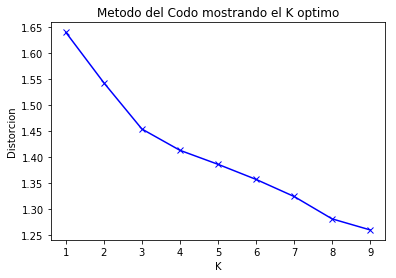

In [196]:
# Metodo del Codo
# 
# Convertir la matriz_incidencia generada en una matriz para ser usada con numpy
print(data_metodos)

distortions = []

data=data_metodos
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot del metodo del codo

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distorcion')
plt.title('Metodo del Codo mostrando el K optimo')
plt.show()

In [197]:
# Metodo de Silhouette
# Entrega como resultado en donde el Slhouette_score optimo es 0.14092516241984757
# para un valor de 5 clusters.

range_n_clusters = [ 2, 3, 4, 5, 6, 7,8, 9, 10]
data_sil=data_metodos

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10) 
    cluster_labels = kmeans.fit_predict(data_sil)

    # silhouette_score para n clusters
    silhouette_avg = silhouette_score(data_sil, cluster_labels)
    print("Para N clusters =", n_clusters,
          " Valor Silhouette_score :", silhouette_avg)

Para N clusters = 2  Valor Silhouette_score : 0.09365573283492713
Para N clusters = 3  Valor Silhouette_score : 0.11889942863638556
Para N clusters = 4  Valor Silhouette_score : 0.12347053919571699
Para N clusters = 5  Valor Silhouette_score : 0.14092516241984757
Para N clusters = 6  Valor Silhouette_score : 0.1371798939109807
Para N clusters = 7  Valor Silhouette_score : 0.1161092456616906
Para N clusters = 8  Valor Silhouette_score : 0.11339573832632867
Para N clusters = 9  Valor Silhouette_score : 0.12505960527779877
Para N clusters = 10  Valor Silhouette_score : 0.11928332134753233
